<a href="https://colab.research.google.com/github/Ghiscode/Pengolahan-Citra-Digital/blob/main/Assignment4_PCD_(Group).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Fungsi untuk menampilkan gambar
def tampilkan_gambar(img, title="Gambar"):
    plt.figure(figsize=(8, 6))
    if len(img.shape) == 3:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title, fontweight='bold')
    plt.axis('off')
    plt.show()

# Fungsi untuk memuat gambar
def muat_gambar(path):
    img = cv2.imread(path)
    if img is None:
        print(f"❌ Gagal memuat: {path}")
        return None
    print(f"✅ Berhasil memuat: {path}")
    return img

1. PERHALUS GAMBAR & MINIMALISIR NOISE

✅ Berhasil memuat: diary.png


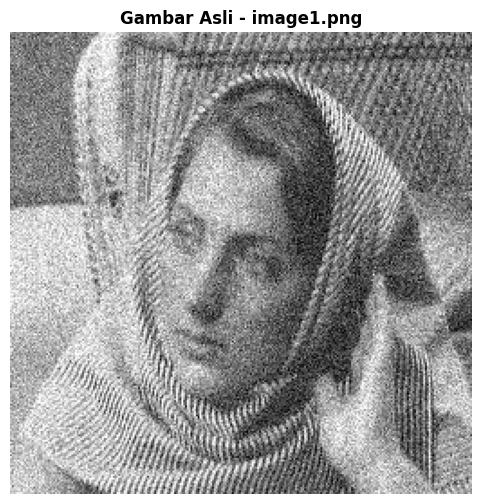

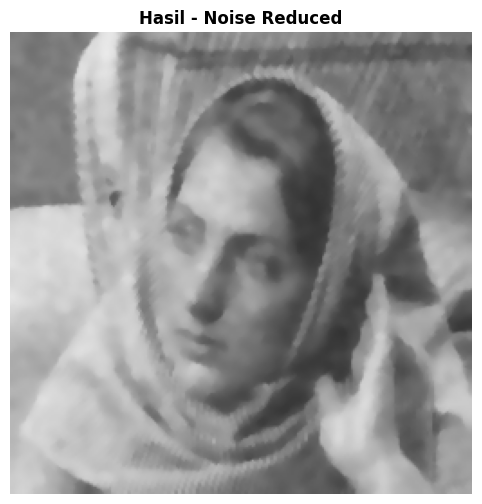

💾 Hasil disimpan: hasil_image1.jpg


In [ ]:

gambar1 = muat_gambar('diary.png')
if gambar1 is not None:
    tampilkan_gambar(gambar1, "Gambar Asli - image1.png")

    # Tahap 1: Gaussian Blur untuk noise reduction
    tahap1 = cv2.GaussianBlur(gambar1, (3, 3), 0)

    # Tahap 2: Median Filter untuk salt-and-pepper noise
    tahap2 = cv2.medianBlur(tahap1, 3)

    # Tahap 3: Bilateral Filter untuk menjaga edges
    hasil1 = cv2.bilateralFilter(tahap2, 9, 75, 75)

    tampilkan_gambar(hasil1, "Hasil - Noise Reduced")
    cv2.imwrite('hasil_image1.jpg', hasil1)
    print("💾 Hasil disimpan: hasil_image1.jpg")

2. MINIMALISIR BLUR & TINGKATKAN KEJELASAN

✅ Berhasil memuat: Picture2.jpg


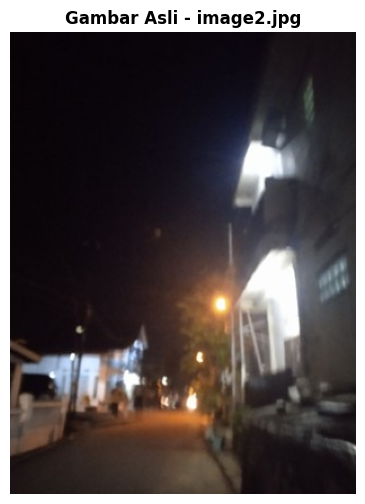

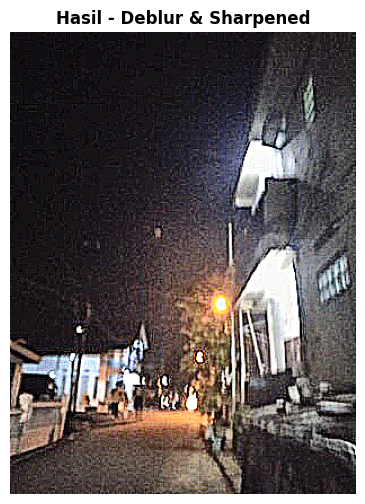

💾 Hasil disimpan: hasil_image2.jpg


In [ ]:
gambar2 = muat_gambar('Picture2.jpg')
if gambar2 is not None:
    tampilkan_gambar(gambar2, "Gambar Asli - image2.jpg")

    # Tahap 1: Unsharp Masking untuk ketajaman
    blur = cv2.GaussianBlur(gambar2, (0, 0), 3.0)
    tahap1 = cv2.addWeighted(gambar2, 1.5, blur, -0.5, 0)

    # Tahap 2: Kernel Sharpening
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    tahap2 = cv2.filter2D(tahap1, -1, kernel)

    # Tahap 3: CLAHE untuk kontras
    lab = cv2.cvtColor(tahap2, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l_clahe = clahe.apply(l)
    lab_clahe = cv2.merge([l_clahe, a, b])
    hasil2 = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

    tampilkan_gambar(hasil2, "Hasil - Deblur & Sharpened")
    cv2.imwrite('hasil_image2.jpg', hasil2)
    print("💾 Hasil disimpan: hasil_image2.jpg")

3.PERHALUS & PERTAJAM GAMBAR

✅ Berhasil memuat: Picture3.jpg


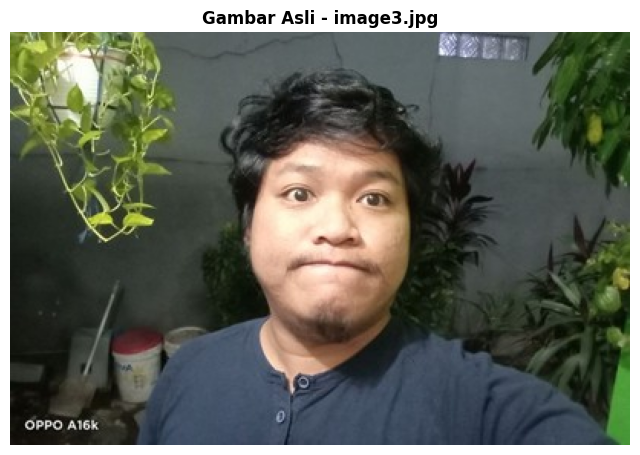

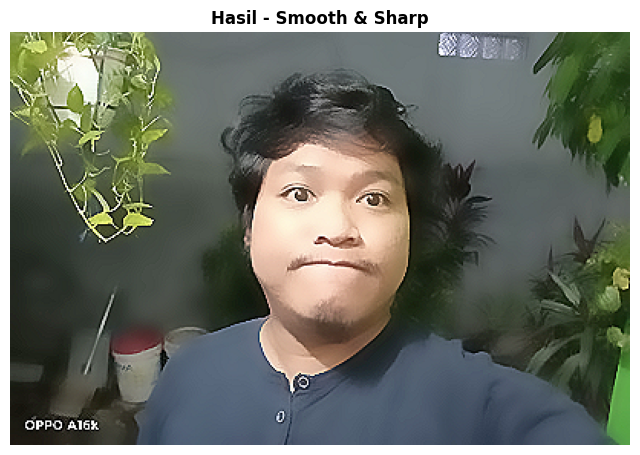

💾 Hasil disimpan: hasil_image3.jpg


In [ ]:
gambar3 = muat_gambar('Picture3.jpg')
if gambar3 is not None:
    tampilkan_gambar(gambar3, "Gambar Asli - image3.jpg")

    # Tahap 1: Bilateral Filter untuk penghalusan
    tahap1 = cv2.bilateralFilter(gambar3, 15, 80, 80)

    # Tahap 2: Gamma Correction untuk brightness
    gamma = 1.2
    tahap2 = np.power(tahap1/255.0, 1.0/gamma)
    tahap2 = np.uint8(tahap2 * 255)

    # Tahap 3: Sharpening untuk ketajaman
    kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
    hasil3 = cv2.filter2D(tahap2, -1, kernel)

    tampilkan_gambar(hasil3, "Hasil - Smooth & Sharp")
    cv2.imwrite('hasil_image3.jpg', hasil3)
    print("💾 Hasil disimpan: hasil_image3.jpg")